In [74]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


## Import packages

In [75]:
#Import some packages
import seaborn as sns
import matplotlib.pyplot as plt 
# import trax
# from trax import layers as tl
# from trax.fastmath import numpy as fastnp
# from trax.supervised import training

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Expolatory Data Analysis 

In [76]:
# Load datasets
diabetets_data = pd.read_csv('../input/pima-indians-diabetes-database/diabetes.csv')

# Examine the first 5 rows
diabetets_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Before jumping into the data we first need to understand our variables:
- Pregnancies: Number of times pregnant
- Glucose: The blood plasma glucose concentration after a 2 hour oral glucose tolerance test.
- BloodPressure: Diastolic blood pressure (mm/HG).
- SkinThickness: Skinfold thickness of the triceps (mm).
- Insulin: 2 hour serum insulin (mu U/ml).
- BMI: Body mass index (kg/m squared)
- DiabetesPedigreeFunction: A function that determines the risk of type 2 diabetes based on family history, the larger the function, the higher the risk of type 2 diabetes.
- Age: ...
- Outcome: Whether the person is diagnosed with type 2 diabetes (1 = yes, 0 = no).

### Some basic commands to examine the data

In [77]:
diabetets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [78]:
diabetets_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


The diabetes 

The *diabetes data* osberves no missing data, all the columns fall into the number catagory and we have no string type values. The **BMI** *and* **DiabetesPedigreeFunction** are two calculated function therefore they are the only ones with float type.

Nonetheless, other columns as **Glucose**, **BloodPressure**, **SkinThickness** and **Insulin** normally recorded as numeric type with decimal value. So we will convert these values to float to prevent misleading results.

In [79]:
process_diabetets_data = diabetets_data.copy()
process_diabetets_data[["Glucose", "BloodPressure", "SkinThickness", "Insulin"]] = process_diabetets_data[["Glucose", "BloodPressure", "SkinThickness", "Insulin"]].astype(float)
process_diabetets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


### Class Distribution

0    500
1    268
Name: Outcome, dtype: int64


<AxesSubplot:xlabel='Outcome', ylabel='count'>

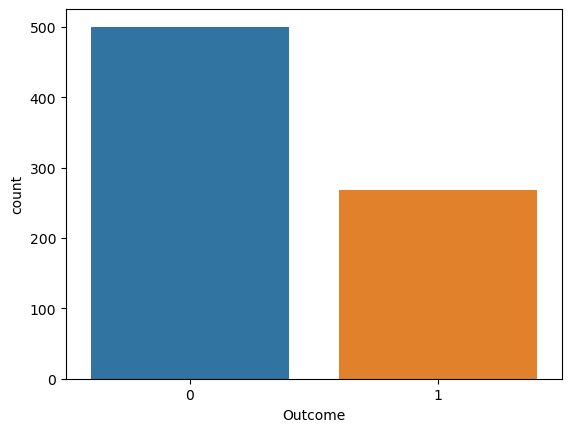

In [80]:
## checking the balance of the data by plotting the count of outcomes by their value

print(process_diabetets_data.Outcome.value_counts())
sns.countplot(x='Outcome', data=process_diabetets_data)

We can see that the number of patient diagnosed with no diabetes are as twice as people with diabetes, so the data is biased toward the patient with no diabetes.

However, we just need to make sure that there is enough data for your model to learn how to differentiate between the two. So the unbalanced data here might not results in serious problem.

### Outliers

In the **Pregnancies** columns, we can see that while the maximum is 17, the **75% percentile** is only 6 which indicates that 75% of our data has values smaller than 6. As a results, we can estimate that this maximum value of **Pregnancies** is an **outlier**. 

The same similarity can be found in **Insulin** variable but it is less certain (a woman with 17 childs is less likely to be true). So, we will apply a method for (approximately) detecting outliers called **Z-Score**

In [81]:
# Z-score function
def Zscore_outlier(df_col):
    
    # output a dict of {num_row:row} key-pair
    outlier={}

    m = np.mean(df_col)
    sd = np.std(df_col)
    
    for row in df_col: 
        z = (row-m)/sd
        
        # if the z-score more than 3, it is different from 99.7% of data. 
        # So quite suppicious, we can of course increase this later to 4 or 5 for wider value range
        if np.abs(z) > 3: 
            outlier[diabetets_data.index[df_col == row].to_list()[0]] = row
            
    return outlier

In [82]:
#Pregnancies
pregnancies_outliers = Zscore_outlier(diabetets_data['Pregnancies'])
print(f"Pregnancies outliers:")
print('\n'.join(['Row {0}: {1}'.format(k, v) for k,v in pregnancies_outliers.items()]))

Pregnancies outliers:
Row 88: 15
Row 159: 17
Row 298: 14


In [83]:
#Glucose
glucose_outliers = Zscore_outlier(diabetets_data['Glucose'])
print(f"Glucose outliers:")
print('\n'.join(['Row {0}: {1}'.format(k, v) for k,v in glucose_outliers.items()]))

Glucose outliers:
Row 75: 0


In [84]:
#BloodPressure
bloodPressure_outliers = Zscore_outlier(diabetets_data['BloodPressure'])
print(f"BloodPressure outliers:")
print('\n'.join(['Row {0}: {1}'.format(k, v) for k,v in bloodPressure_outliers.items()]))


BloodPressure outliers:
Row 7: 0


In [85]:
#SkinThickness
skinThickness_outliers = Zscore_outlier(diabetets_data['SkinThickness'])
print(f"SkinThickness outliers:")
print('\n'.join(['Row {0}: {1}'.format(k, v) for k,v in skinThickness_outliers.items()]))


SkinThickness outliers:
Row 579: 99


In [86]:
#Insulin
insulin_outliers = Zscore_outlier(diabetets_data['Insulin'])
print(f"Insulin ouatliers:")
print('\n'.join(['Row {0}: {1}'.format(k, v) for k,v in insulin_outliers.items()]))

Insulin ouatliers:
Row 8: 543
Row 13: 846
Row 111: 495
Row 153: 485
Row 220: 478
Row 228: 744
Row 247: 680
Row 286: 545
Row 370: 465
Row 409: 579
Row 415: 474
Row 486: 480
Row 584: 600
Row 645: 440
Row 655: 540
Row 753: 510


In [87]:
#BMI
bmi_outliers = Zscore_outlier(diabetets_data['BMI'])
print(f"BMI ouatliers:")
print('\n'.join(['Row {0}: {1}'.format(k, v) for k,v in bmi_outliers.items()]))

BMI ouatliers:
Row 9: 0.0
Row 177: 67.1
Row 445: 59.4
Row 673: 57.3


In [88]:
#DiabetesPedigreeFunction
diabetesFunction_outliers = Zscore_outlier(diabetets_data['DiabetesPedigreeFunction'])
print(f"DiabetesPedigreeFunction ouatliers:")
print('\n'.join(['Row {0}: {1}'.format(k, v) for k,v in diabetesFunction_outliers.items()]))

DiabetesPedigreeFunction ouatliers:
Row 4: 2.288
Row 45: 1.893
Row 58: 1.781
Row 228: 2.329
Row 330: 1.476
Row 370: 2.137
Row 371: 1.731
Row 395: 1.6
Row 445: 2.42
Row 593: 1.699
Row 621: 1.698


In [89]:
#Age
age_outliers = Zscore_outlier(diabetets_data['Age'])
print(f"Age ouatliers:")
print('\n'.join(['Row {0}: {1}'.format(k, v) for k,v in age_outliers.items()]))

Age ouatliers:
Row 123: 69
Row 453: 72
Row 459: 81
Row 666: 70


We can see that every columns has outliers, but only enormously on **Insulin** column with around 20 outliers. However, we will need to find a way to work around these outliers later  

#### Heatmap of Correlation 

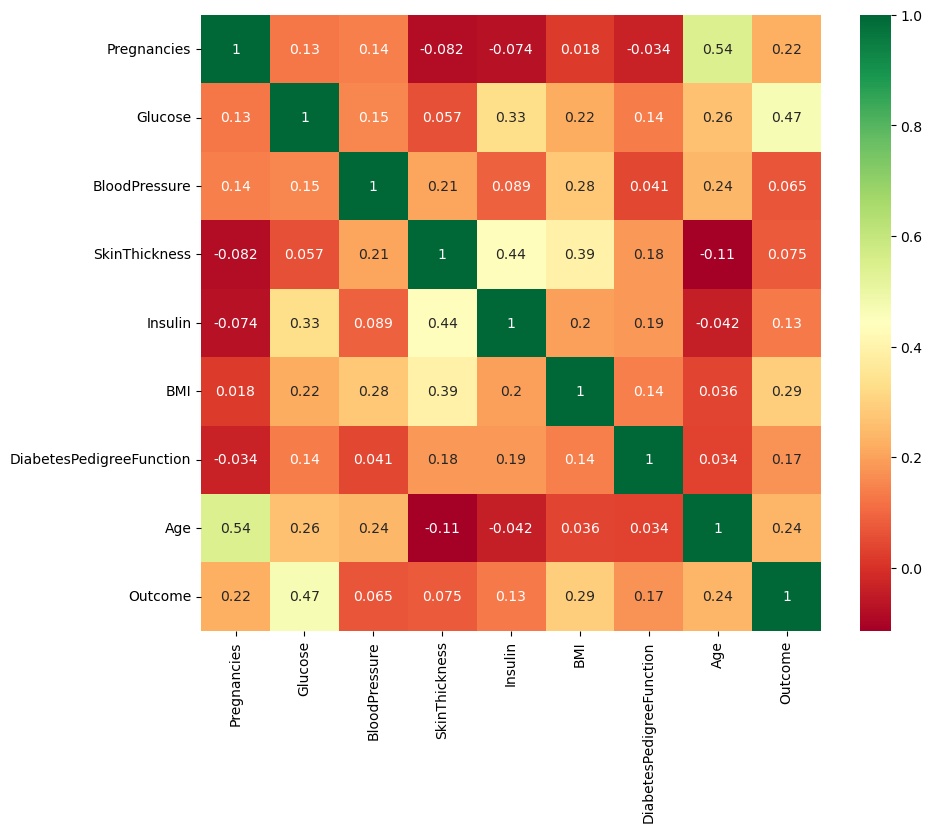

In [90]:
plt.figure(figsize=(10,8)) 
p=sns.heatmap(diabetets_data.corr(), annot=True,cmap ='RdYlGn') 

Fortunately, there is little correlation between variables where the largest one is between **Age** *and* **Pregnancies** (around 0.54). So, no further processing needed in this part

### Min value = 0
There are 5 columns: **Glucose**, **BloodPressure**, **SkinThickness**, **Insulin**, **BMI** with minimum value = 0 that are not reasonable for a appropriate data point (how on earth your BloodPressure = 0 right). So these might be a results of missing data but are recorded as 0.

With **Pregnancies**, the value of 0 means that woman never gives birth before, so we did not consider it into our processing step

We first of all replace all these 0 values with *NaN* and then base on each columns decide which value to fill on

In [91]:
process_diabetets_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = process_diabetets_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

# Showing the count of Nans
process_diabetets_data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Now, we will use **IMPUTATION** method to fill our thes NaN values based on each variables distribution

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

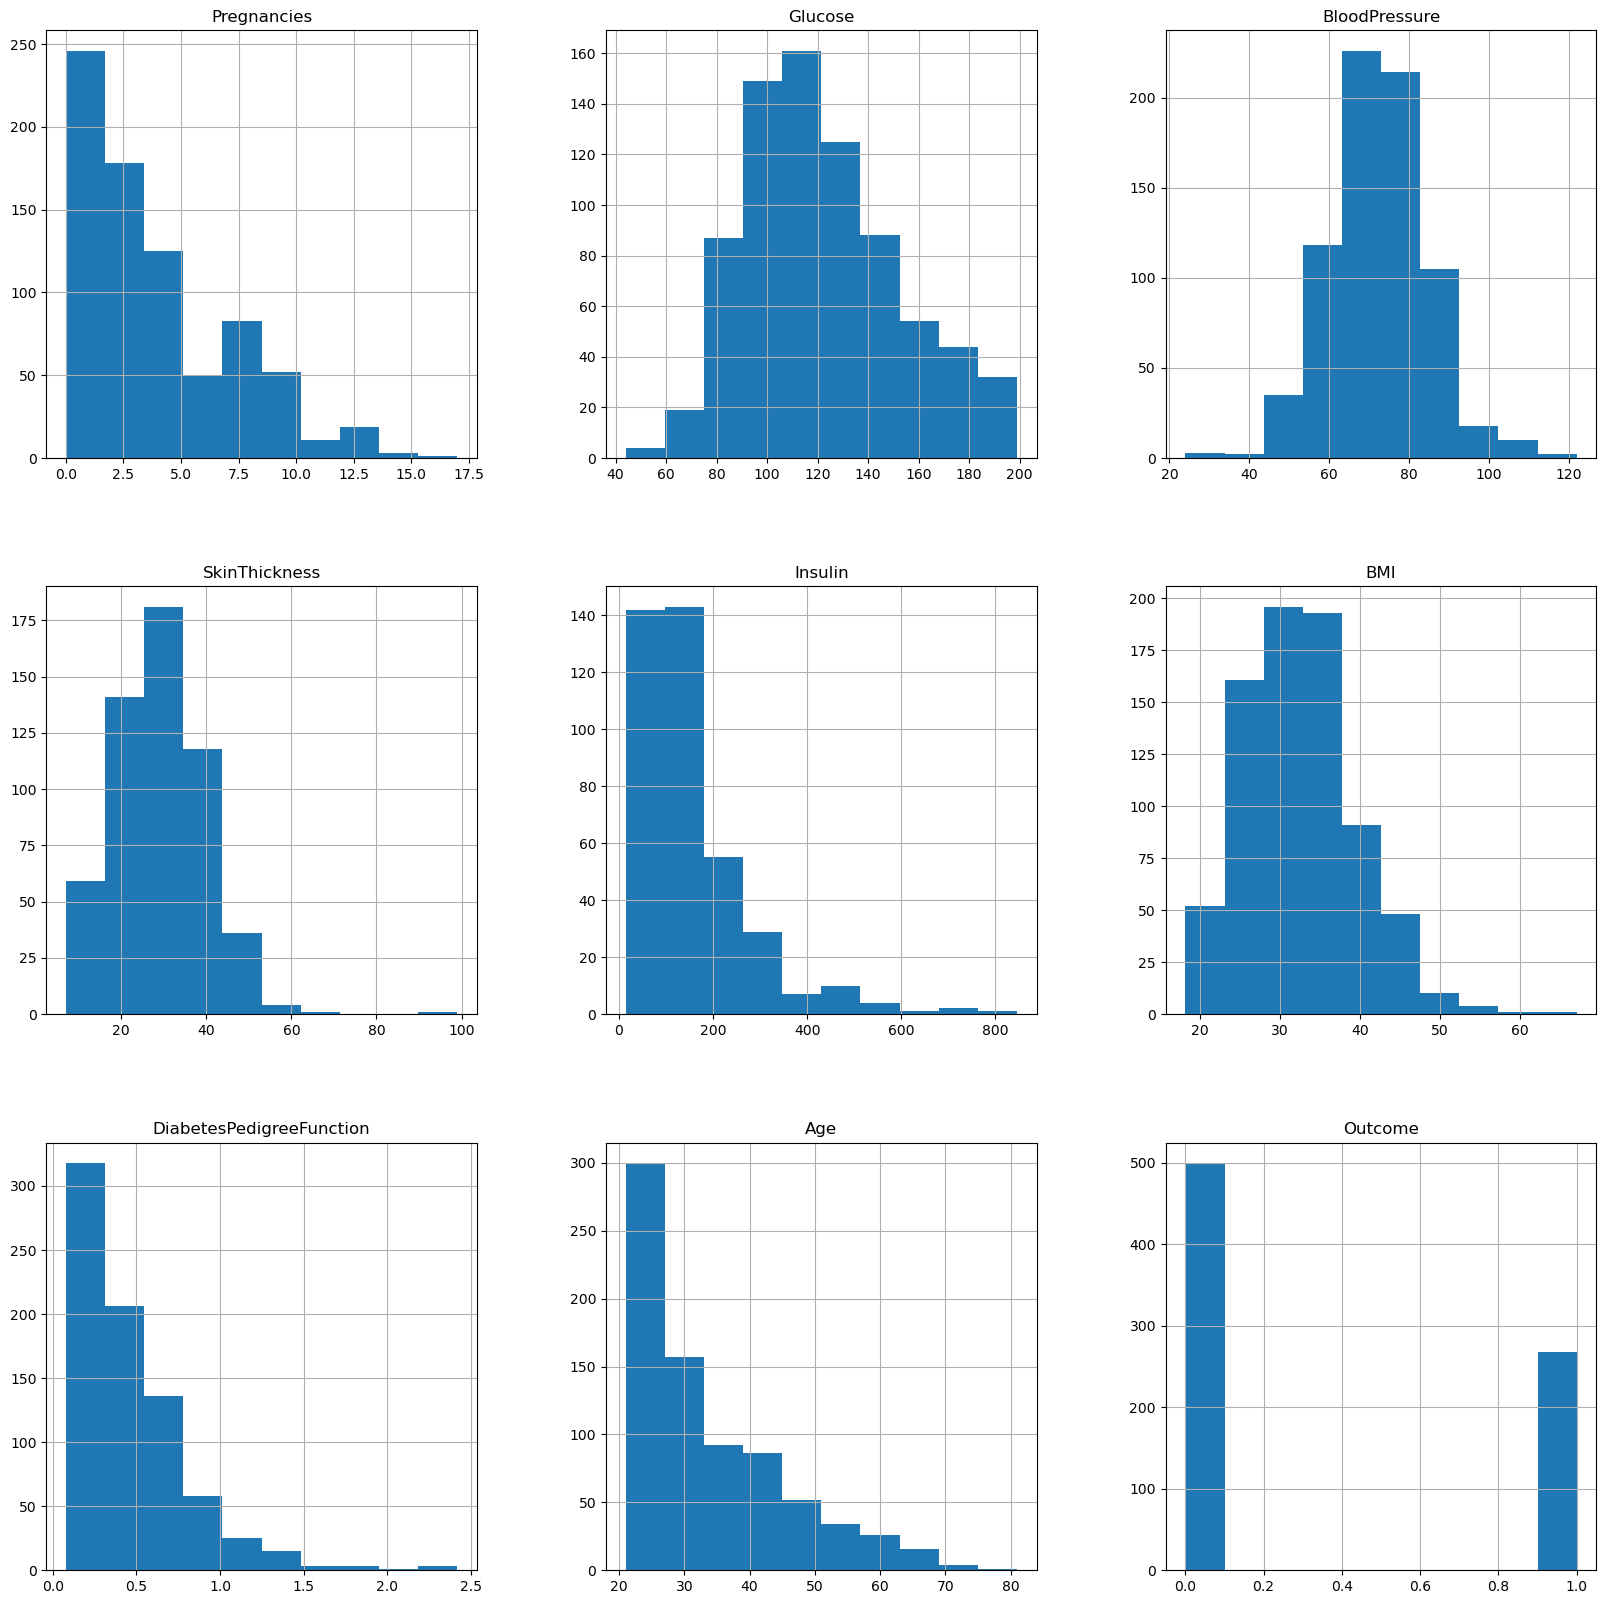

In [92]:
# process_diabetets_data.hist()
process_diabetets_data.hist(figsize = (20,20))

As **Glucose** *and* **BloodPressure** has a "centered" distribution, we can use the mean to replace the NaN values. While with other cloumns, there are mostly right-skewed distribution, which causes using **mean** might not appropriate in this case. Therefore we will use **median** to replace these values.

**Note**: One thing to pay attention to is that **SkinThickness** and **Insulin** has a large amount of missing values (around 50% in Insulin and around 30% in SkinThickness), so when we try to fill this much to the data, it could result in less realistics data (especially with medical one) and cannot be generalized well with unseen one. 

Therefore, after training and evaluating, another approach to handle NaN values might be drop off these 2 columns with so many missing values.

In [93]:
process_diabetets_data['Glucose'].fillna(process_diabetets_data['Glucose'].mean(), inplace = True)
process_diabetets_data['BloodPressure'].fillna(process_diabetets_data['BloodPressure'].mean(), inplace = True)
process_diabetets_data['SkinThickness'].fillna(process_diabetets_data['SkinThickness'].median(), inplace = True)
process_diabetets_data['Insulin'].fillna(process_diabetets_data['Insulin'].median(), inplace = True)
process_diabetets_data['BMI'].fillna(process_diabetets_data['BMI'].median(), inplace = True)

#### Histogram of variables after imputing NaN values

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

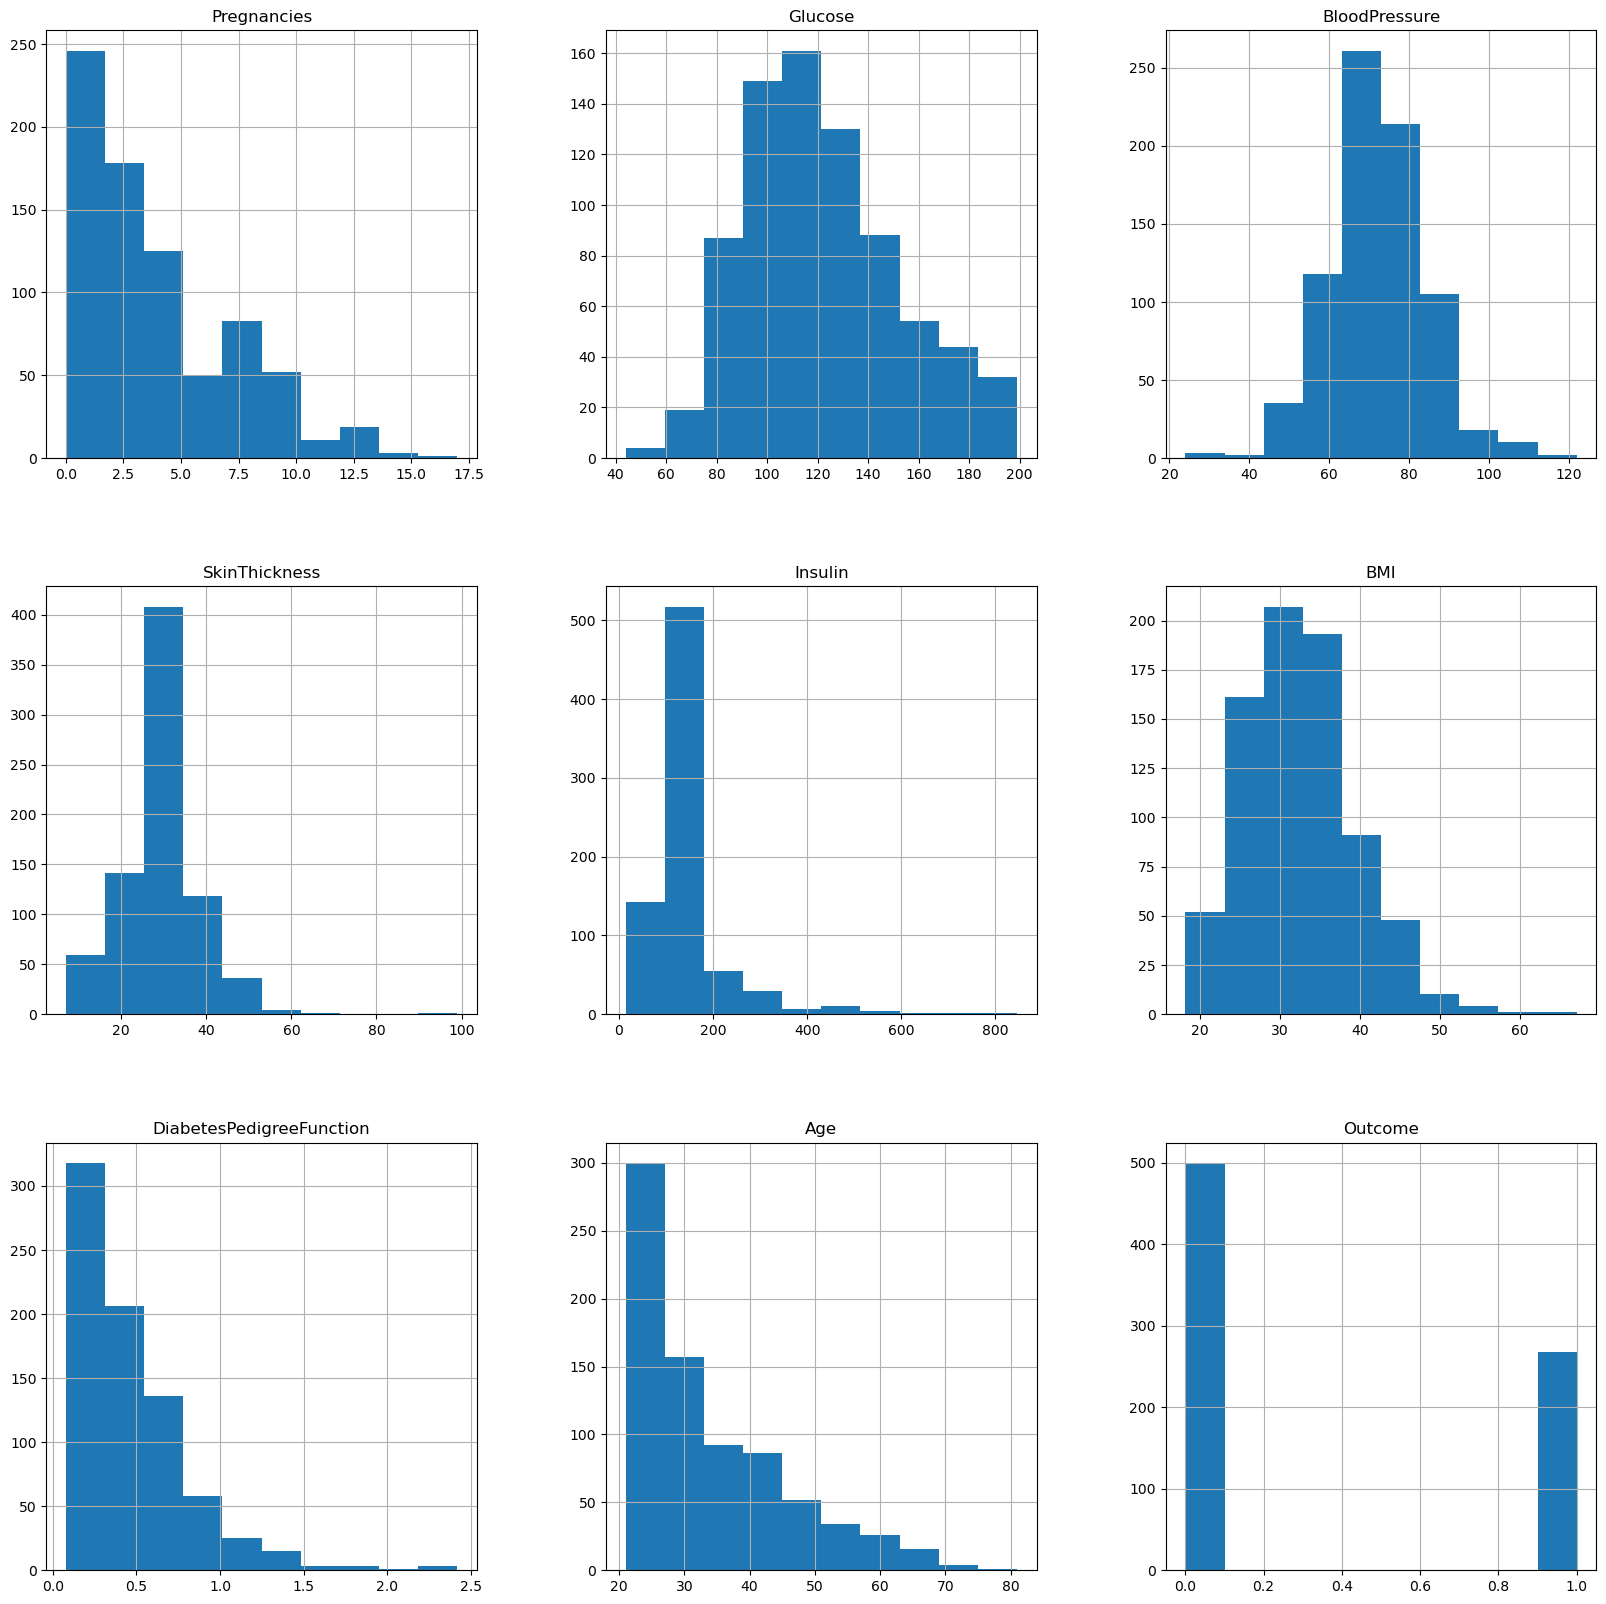

In [94]:
process_diabetets_data.hist(figsize = (20,20))

### Handling Outliers

There are many ways to handle outliers. One of popular method is if that variables or rows are not significant, we can just **drop** it. However, in our case where data is very little, every data is precious, so we can use other methods like Transformer to transform our data. I will apply **Box-Cox Transformation** in this scenario as transformed values could reduce the variation caused by extreme values

Before starting let's draw some boxplots

<AxesSubplot:>

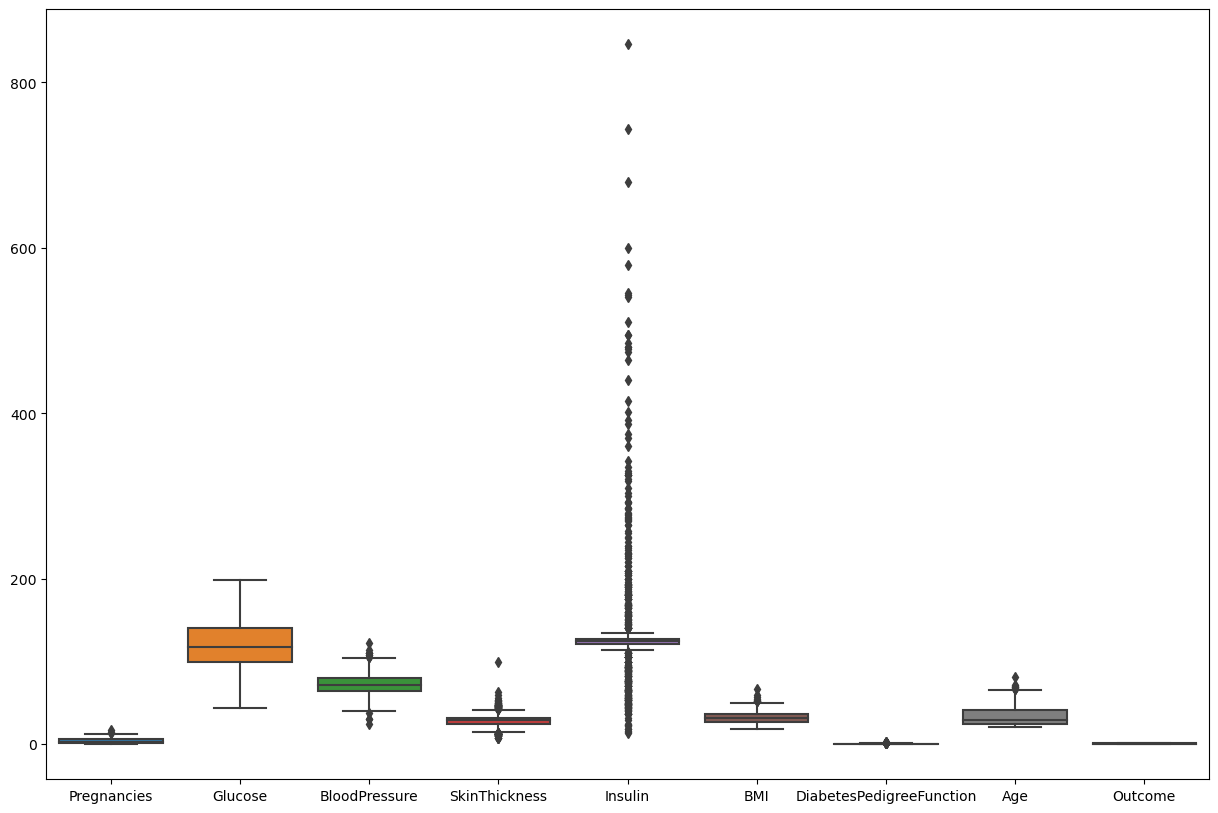

In [95]:
plt.figure(figsize=(15,10))
sns.boxplot(process_diabetets_data)

As we observed already from NaN values, **Insulin** has the most outliers out of 8 variables along with **SkinThickness**. Other variables apprear with less outliers so we can leave it there and apply Box-Cox Transformation only for **SkinThickness** *and* **Insulin** columns 

In [96]:
process_diabetets_data['Pregnancies'].loc[process_diabetets_data['Pregnancies'] < 0].value_counts()

Series([], Name: Pregnancies, dtype: int64)

<AxesSubplot:>

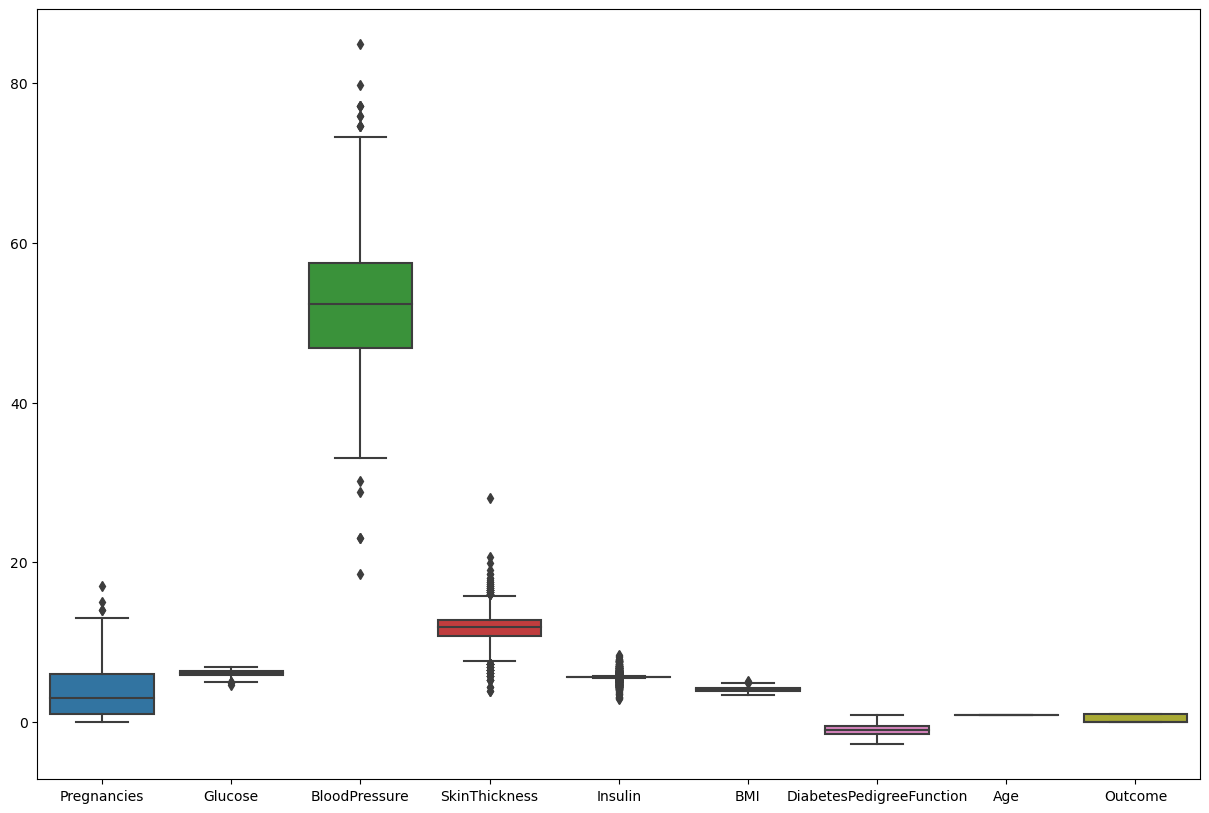

In [97]:
# import packages for Box-Cox transformation function
import scipy
process_diabetets_data2 = process_diabetets_data.copy()

# scipy return transformed data and the lambda used for tranforming
process_diabetets_data2["Insulin"], fitted_lambda_insulin = scipy.stats.boxcox(process_diabetets_data["Insulin"],lmbda=None)
process_diabetets_data2["SkinThickness"], fitted_lambda_skinthick = scipy.stats.boxcox(process_diabetets_data["SkinThickness"],lmbda=None)

process_diabetets_data2["Glucose"], fitted_lambda_glu = scipy.stats.boxcox(process_diabetets_data["Glucose"],lmbda=None)
process_diabetets_data2["BloodPressure"], fitted_lambda_blood_press = scipy.stats.boxcox(process_diabetets_data["BloodPressure"],lmbda=None)
process_diabetets_data2["BMI"], fitted_lambda_bmi = scipy.stats.boxcox(process_diabetets_data["BMI"],lmbda=None)
process_diabetets_data2["DiabetesPedigreeFunction"], fitted_lambda_dia_ped_func = scipy.stats.boxcox(process_diabetets_data["DiabetesPedigreeFunction"],lmbda=None)
process_diabetets_data2["Age"], fitted_lambda_age = scipy.stats.boxcox(process_diabetets_data["Age"],lmbda=None)

plt.figure(figsize=(15,10))
sns.boxplot(process_diabetets_data2)

<AxesSubplot:>

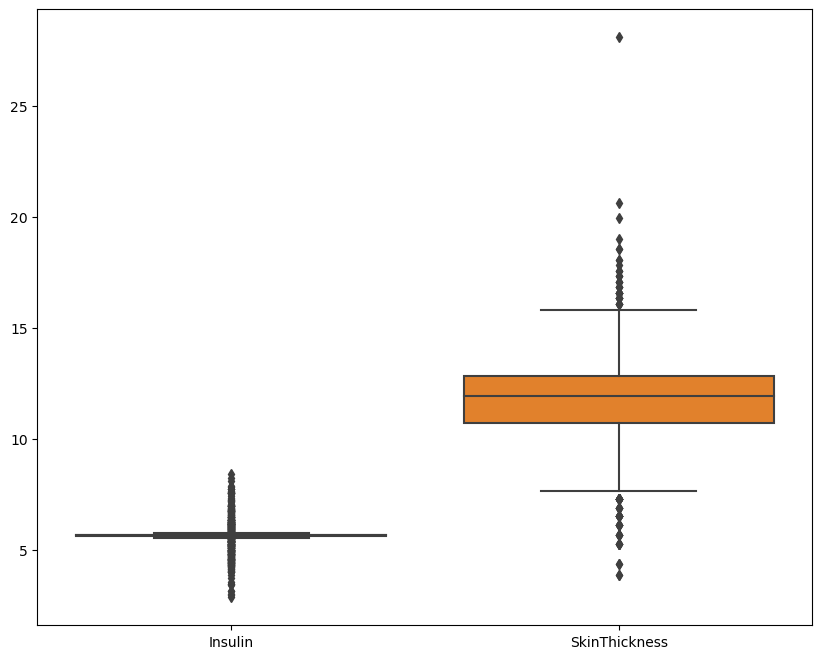

In [98]:
plt.figure(figsize=(10,8))
sns.boxplot(process_diabetets_data2.loc[:, ["Insulin", "SkinThickness"]])

Even after imputation and tranforming, these 2 columns are still returned a lot of outliers plus the fact that we have fill a lot of missing values with median. These variables could not contribute well to our model. Therefore, we should now drop these columns for a better model.

In [99]:
process_diabetets_data2 = process_diabetets_data2.drop(["Insulin", "SkinThickness"], axis=1)

<AxesSubplot:>

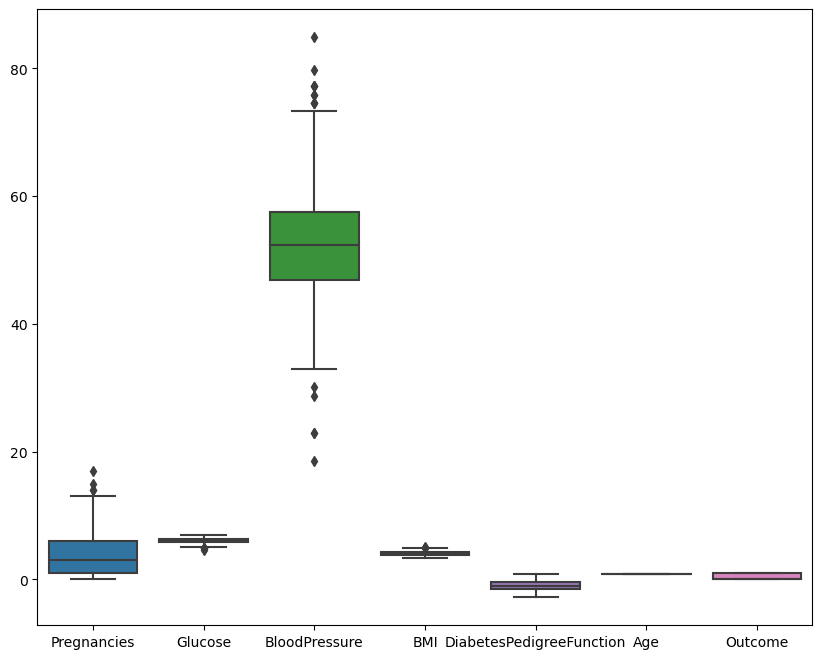

In [100]:
plt.figure(figsize=(10,8))
sns.boxplot(process_diabetets_data2)

In [101]:
process_diabetets_data2.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,6.441709,52.196163,4.148268,-0.474866,0.901093,1
1,1,5.562309,48.152400,3.829057,-1.088080,0.892411,0
2,8,6.791131,46.796993,3.651087,-0.403329,0.893138,1
3,1,5.633433,48.152400,3.903401,-1.912132,0.881083,0
4,0,6.316365,30.175101,4.496126,0.803134,0.893820,1


## Test Train Split and Cross Validation methods

Time to split data and start training. 

The `stratify` parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

We will use 2 data: a data without transformation and one with transformation. Sometimes, its is the most ideal when we have another dataset for testing whether training with 1 data results in better model or not. However as we do not have enough data to split, I will go with comparision between ML and DL model for the same data.

In real life, the customer will have their own seperated test data and report back to use the perfromance of the models. So, I will preassume that our beloved teacher has his own data to test models' performance. During the deploying section with Streamlit, I will various option of model to predict on new test,

In [141]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))


# Data with normalization
X_no_transfrom = process_diabetets_data.drop("Outcome", axis=1)
y_no_transfrom = process_diabetets_data['Outcome']

X_scaled = scaler.fit_transform(X_no_transfrom)

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled,y_no_transfrom, train_size=0.9, test_size=0.1,random_state=42, stratify=y_no_transfrom)

# Data with Box-Cox transformation
X = process_diabetets_data2.drop("Outcome", axis=1)
y = process_diabetets_data2['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.9, test_size=0.1,random_state=42, stratify=y)


**XGBoost** is currently the most robust and fast machine learning methods nowadays. Therefore, in this problem i will apply and using it. First we need to install its package

In [31]:
from scipy.stats import uniform, randint
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV
import xgboost as xgb
from pprint import pprint
import pickle 

xgb_model = xgb.XGBClassifier()
xgb_model_scaled = xgb.XGBClassifier()

print('Parameters currently in use:\n')
pprint(xgb_model.get_params())

params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4),
    "min_child_weight": [1, 5, 10],
    'subsample': [0.6, 0.8, 1.0],
}

# Random search of parameters, using 5 fold cross validation, 
# search across 200 different combinations, and use all available cores
xgb_search = RandomizedSearchCV(xgb_model, param_distributions=params, random_state=42, n_iter=300, cv=5, verbose=1, n_jobs=-1, return_train_score=True)
xgb_search_scaled = RandomizedSearchCV(xgb_model_scaled, param_distributions=params, random_state=42, n_iter=300, cv=5, verbose=1, n_jobs=-1, return_train_score=True)

xgb_search.fit(X, y)
xgb_search_scaled.fit(X_scaled, y_no_transfrom)

# Save random tuning model
with open('/kaggle/working/xgb_searchcv_model.pkl','wb') as f:
    pickle.dump(xgb_search, f)
    
with open('/kaggle/working/xgb_searchcv_model_scaled.pkl','wb') as f:
    pickle.dump(xgb_search_scaled, f)

Parameters currently in use:

{'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'objective': 'binary:logistic',
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'use_label_encoder': False,
 'validate_parameters': None,
 'verbosity': None}
Fitting 5 folds for each of 300 candidates, totalling 1500 fi

#### Create a function to show the best results. 

Credit to: [Stuart Hallows](https://www.kaggle.com/stuarthallows) for implementing this function

In [104]:
# Load the XGBoost model after training
with open('xgb_searchcv_model.pkl', 'rb') as f:
    xgb_search = pickle.load(f)
    
with open('xgb_searchcv_model_scaled.pkl', 'rb') as f:
    xgb_search_scaled = pickle.load(f)

def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

print("XGBoost with transformation:")
report_best_scores(xgb_search.cv_results_, 1)

XGBoost with transformation:
Model with rank: 1
Mean validation score: 0.774 (std: 0.038)
Parameters: {'colsample_bytree': 0.8807322777703357, 'gamma': 0.2768515261729004, 'learning_rate': 0.09381836850726868, 'max_depth': 2, 'min_child_weight': 10, 'n_estimators': 115, 'subsample': 0.6}



In [105]:
pprint(xgb_search.best_params_)

{'colsample_bytree': 0.8807322777703357,
 'gamma': 0.2768515261729004,
 'learning_rate': 0.09381836850726868,
 'max_depth': 2,
 'min_child_weight': 10,
 'n_estimators': 115,
 'subsample': 0.6}


#### XGBoost training on data with normalization

In [106]:
print("XGBoost with normalization:")
report_best_scores(xgb_search_scaled.cv_results_, 1)

XGBoost with normalization:
Model with rank: 1
Mean validation score: 0.773 (std: 0.031)
Parameters: {'colsample_bytree': 0.8386017410932398, 'gamma': 0.47364166980590766, 'learning_rate': 0.07600542093482406, 'max_depth': 2, 'min_child_weight': 5, 'n_estimators': 117, 'subsample': 0.6}



In [107]:
pprint(xgb_search_scaled.best_params_)

{'colsample_bytree': 0.8386017410932398,
 'gamma': 0.47364166980590766,
 'learning_rate': 0.07600542093482406,
 'max_depth': 2,
 'min_child_weight': 5,
 'n_estimators': 117,
 'subsample': 0.6}


#### After training, save the data for later used on LSTMs. 

In [108]:
# no transform
process_diabetets_data.to_csv("process_diabetes_1.csv", index=False)

# transform and drop 2 columns
process_diabetets_data2.to_csv("process_diabetes_2.csv",index=False)

## Model Evaluation for XGBoost with Transformation

#### 1. Confusion Matrix

Text(0.5, 23.52222222222222, 'Predicted label')

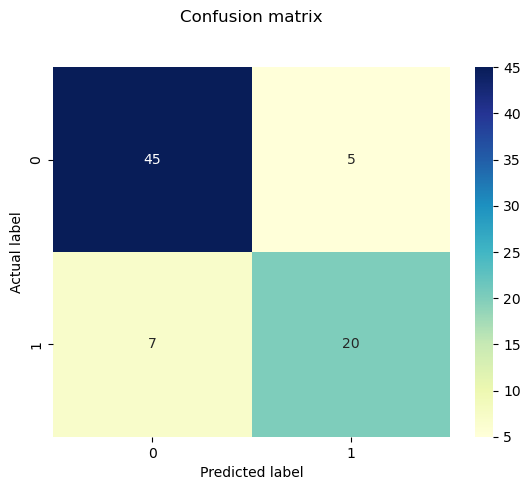

In [109]:
from sklearn import metrics

#let us get the predictions using the classifier we had fit above
y_pred = xgb_search.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')

plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#### 2. Classification Report

In [110]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88        50
           1       0.80      0.74      0.77        27

    accuracy                           0.84        77
   macro avg       0.83      0.82      0.83        77
weighted avg       0.84      0.84      0.84        77



#### 3. ROC - AUC

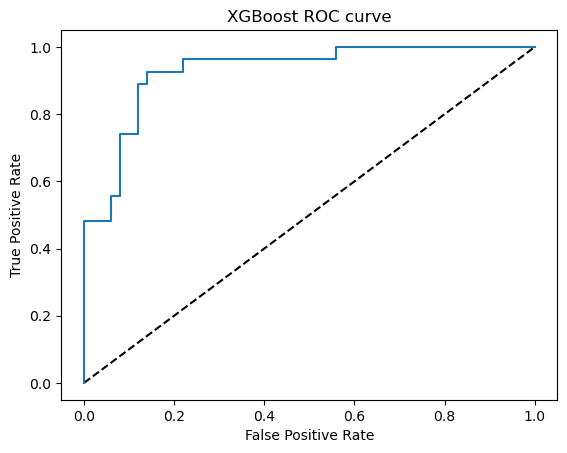

In [111]:
from sklearn.metrics import roc_curve
#Transformation
y_pred_proba = xgb_search.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Normalization
y_pred_proba_scaled = xgb_search_scaled.predict_proba(X_test_scaled)[:,1]

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC curve')
plt.show()

In [112]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score, accuracy_score
print("ROC-AUC score for XGBoost with Transformation:",roc_auc_score(y_test,y_pred_proba))
print("ROC-AUC score for XGBoost with Normalization:",roc_auc_score(y_test_scaled,y_pred_proba_scaled))

ROC-AUC score for XGBoost with Transformation: 0.9288888888888889
ROC-AUC score for XGBoost with Normalization: 0.9207407407407406


## LSTMs Models

We will now building a LSTMs Neural network to predicting whether a patient has the diabetes or not given the inputs.

One thing to notice that LSTMs work best for sequential data like texts, video, or time-series data. As we given a tabular data, the results of the model might not be high as XGBoost approach (with ROC-AUC score around 92%).

In [113]:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled,y_no_transfrom, train_size=0.9, test_size=0.1,random_state=42, stratify=y)

# reshape input to be 3D [samples, timesteps, features]
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

In [114]:
print(X_train_lstm.shape, y_train_scaled.shape, X_test_lstm.shape, y_test_scaled.shape) 

(691, 1, 8) (691,) (77, 1, 8) (77,)


## LSTMs with Normalization Architecture Summary

1) LSTM with 100 neurons in the first visible layer

2) Dropout 15%

3) LSTM with 100 neurons 

4) Dropout 20%

5) LSTM with 100 neurons 

6) 1 neuron in the output layer as it is a binary classifcation

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 1, 100)            43600     
                                                                 
 dropout_8 (Dropout)         (None, 1, 100)            0         
                                                                 
 lstm_13 (LSTM)              (None, 1, 100)            80400     
                                                                 
 dropout_9 (Dropout)         (None, 1, 100)            0         
                                                                 
 lstm_14 (LSTM)              (None, 100)               80400     
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 204,501
Trainable params: 204,501
Non-tr

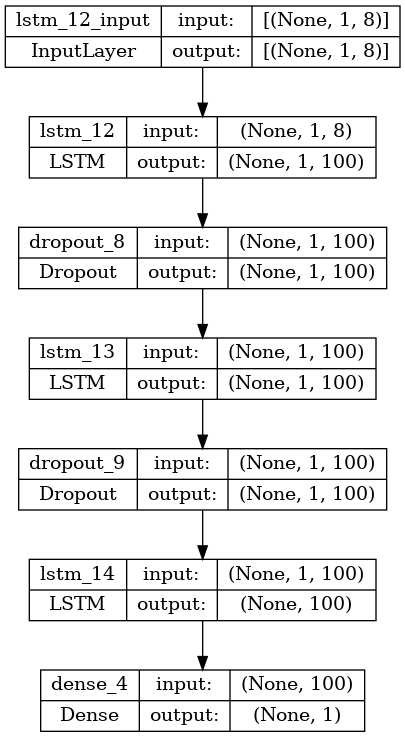

In [115]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

from keras.utils.vis_utils import plot_model
from sklearn.metrics import mean_squared_error

model = Sequential()
model.add(LSTM(100, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]), return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(0.15))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
plot_model(model, to_file='lstms_model_plot.png', show_shapes=True, show_layer_names=True)

(691, 1, 8) (691,) (77, 1, 8) (77,)
3/3 [==============================] - 0s 5ms/step - loss: 0.4394 - accuracy: 0.7143
Test loss, Test acc: [0.4393627643585205, 0.7142857313156128]


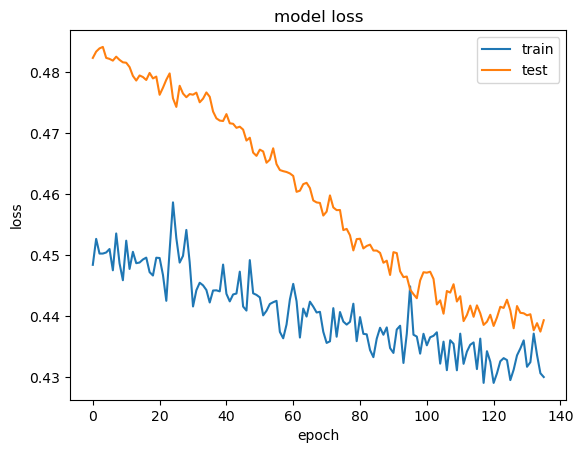

In [61]:
print(X_train_lstm.shape, y_train_scaled.shape, X_test_lstm.shape, y_test_scaled.shape) 

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=15)

tf.random.set_seed(42)
# Fitting data to the model
history = model.fit(X_train_lstm, y_train_scaled, epochs=300, 
                    batch_size=64, validation_data=(X_test_lstm, y_test_scaled), 
                    verbose=0, callbacks=[callback], shuffle=True)

print("Test loss, Test acc:",model.evaluate(X_test_lstm, y_test_scaled))
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
    
# save model
model.save('lstms_model_scaled.h5')

From the chart, we can see that the model started to converge when the epochs increase. However, as the data is very small and the model have learn through all the data points which lead to the more it learn, the more it overfit to the training set which results in increasing in loss and trigger the **EarlyStopping** callback

In [117]:
# calculate ROC-AUC score

lstm_normalized_model = tf.keras.models.load_model('lstms_model_scaled.h5')

y_pred_proba_lstms_normalized = lstm_normalized_model.predict(X_test_lstm)

print("ROC-AUC score for LSTMs with Normalization:",roc_auc_score(y_test_scaled, y_pred_proba_lstms_normalized))

3/3 [==============================] - 1s 5ms/step
ROC-AUC score for LSTMs with Normalization: 0.8577777777777778


The result is still decent with **85% ROC-AUC score**, but still less than with XG-Boost method with around 92%

Now let's try with transformed dataset by Box-Cox formula

## LSTMs with Box-Cox Transformation

In [142]:
# Reshape the data first. Extract the numpy array of DataFrame by using values
X_train_box = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_box = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

print(X_train_box.shape, y_train.shape, X_test_box.shape, y_test.shape) 

(691, 1, 6) (691,) (77, 1, 6) (77,)


### Summary

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_21 (LSTM)              (None, 1, 100)            42800     
                                                                 
 dropout_14 (Dropout)        (None, 1, 100)            0         
                                                                 
 lstm_22 (LSTM)              (None, 1, 100)            80400     
                                                                 
 dropout_15 (Dropout)        (None, 1, 100)            0         
                                                                 
 lstm_23 (LSTM)              (None, 100)               80400     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 203,701
Trainable params: 203,701
Non-tr

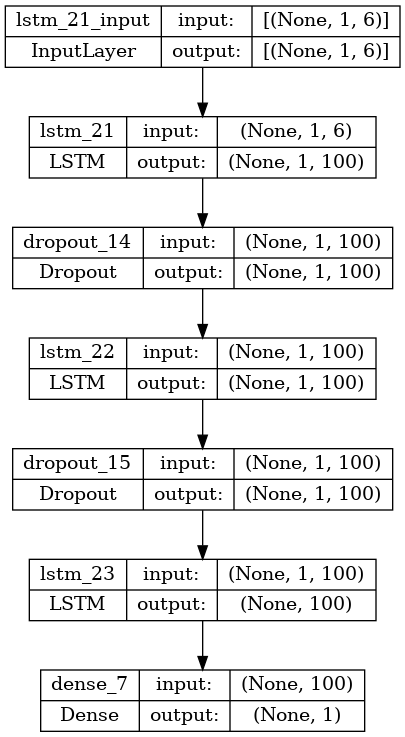

In [143]:
model2 = Sequential()
model2.add(LSTM(100, input_shape=(X_train_box.shape[1], X_train_box.shape[2]), return_sequences=True))
model2.add(Dropout(0.1))
model2.add(LSTM(100, return_sequences=True))
model2.add(Dropout(0.15))
model2.add(LSTM(100))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model2.summary())
plot_model(model2, to_file='lstms_model_box_cox_plot.png', show_shapes=True, show_layer_names=True)

In [144]:
X_train_box.shape

(691, 1, 6)

In [145]:
X_test_box.shape

(77, 1, 6)

3/3 [==============================] - 0s 5ms/step - loss: 0.5217 - accuracy: 0.7532
Test loss, Test acc: [0.5216534733772278, 0.7532467246055603]


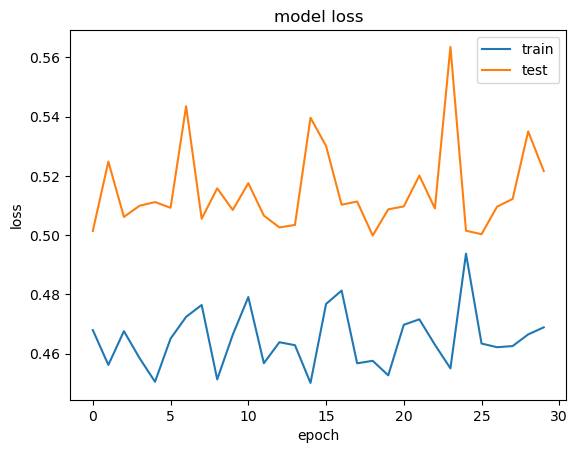

In [158]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=15)

tf.random.set_seed(42)
# Fitting data to the model
history2 = model2.fit(X_train_box, y_train, epochs=300, 
                    batch_size=64, validation_data=(X_test_box, y_test), 
                    verbose=0, callbacks=[callback], shuffle=True)

print("Test loss, Test acc:",model2.evaluate(X_test_box, y_test))

# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
    
# save model
model2.save('lstms_model_box_cox.h5')

With this training/testing loss, we can see more common pattern between training and valdiating set in the chart fluctuate with each other on many points and it also starts to converge at epochs 16. This plot is representive ideal training validating loss chart.

In [159]:
# calculate ROC-AUC score

lstm_boxcox_model = tf.keras.models.load_model('lstms_model_box_cox.h5')

y_pred_proba_lstms_box = lstm_boxcox_model.predict(X_test_box)

print("ROC-AUC score for LSTMs with Normalization:",roc_auc_score(y_test_scaled, y_pred_proba_lstms_box))

3/3 [==============================] - 1s 4ms/step
ROC-AUC score for LSTMs with Normalization: 0.8207407407407408


However, the **ROC-AUC score** is still lower than other models, it is even the lowest score across all the trained one. Still, it is hard to decide which approach on processing data is better but we can say that the **XGBoost** in this problem is **more suitable** method to detect patient with diabetes or not rather than with **LSTMs** model.